# Отток клиентов

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.columns = df.columns.str.lower()

Рассмотрим более подробно пропуски в значении столбца tenure — сколько лет человек является клиентом банка.

In [6]:
df['tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

In [7]:
df['tenure'].isna().sum()

909

Существуют значения 0 в столбце скорее всего означают что человек является клиентом банка менее года, пропуски в значении могут означать аналогичным смысл, поэтому заполним пропуски значением 0.

In [8]:
df['tenure'] = df.fillna(0)
df['tenure'] = df['tenure'].astype('int')

Столбец RowNumber — индекс строки в данных, является дублированием индексации, он является лишним признаком, удалим его.

Удалим столбцы customerid и surname, так как фамилия клиента или его идентификатор лишние признаки в анализе.

In [9]:
df = df.drop(['rownumber', 'customerid', 'surname'], axis=1)

In [10]:
df.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,1,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,2,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,3,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,4,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,5,125510.82,1,1,1,79084.10,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  int64  
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Этап предобработки данных закончен, теперь необходимо подготовить данные для обучения.

In [12]:
df_one = pd.get_dummies(df, columns = ['geography', 'gender'], drop_first=True)

In [13]:
df_one.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,1,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,2,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,3,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,4,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,5,125510.82,1,1,1,79084.10,0,0,1,0


In [14]:
target = df_one['exited']
features = df_one.drop('exited', axis=1)

In [15]:
features_train_80, features_test, target_train_80, target_test = train_test_split(features,target,
                                                                                  test_size=0.2,
                                                                                  random_state=12345,
                                                                                  stratify=target)

In [16]:
features_train, features_valid, target_train, target_valid = train_test_split(features_train_80, target_train_80,
                                                                              test_size=0.25,
                                                                              random_state=12345,
                                                                              stratify=target_train_80)

In [17]:
print(features_train_80.shape)
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(8000, 11)
(6000, 11)
(2000, 11)
(2000, 11)


In [18]:
numeric = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']

In [19]:
scaler = StandardScaler()
pd.options.mode.chained_assignment = None
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
features_train_80[numeric] = scaler.transform(features_train_80[numeric])

In [20]:
features_train.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
5536,-0.143332,0.577533,0.188112,-1.220573,0.797767,1,1,1.029613,0,1,1
8530,1.632702,-0.564119,1.220052,0.435807,-0.916018,1,0,0.237986,0,0,0
1762,1.116413,-0.468981,-1.112670,1.245822,-0.916018,1,1,-0.686104,0,0,0
9090,1.643028,0.006707,1.413067,-1.220573,-0.916018,1,0,-0.391097,0,0,0
8777,-0.484083,-1.420358,1.305186,1.421989,0.797767,1,0,-1.361559,0,1,1


Данные были разделены на обучающие и валидационную выборки, категориальные признаки преобразовали в численные методом ОНЕ, выполнено масштабирование численных признаков методом стандартизации.

## Исследование задачи

In [21]:
df['exited'].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

In [22]:
(df['exited'].count()-df['exited'].sum())/df['exited'].sum()

3.9091801669121256

In [23]:
df['exited'].sum()/(df['exited'].count()-df['exited'].sum())

0.25580811252040686

Целевой признак не сбалалансирован.

Обучим логистическую регрессию без учета дисбаланса:

In [24]:
def logistic_regression(train, target):
    model = LogisticRegression(random_state=12345, 
                               solver='liblinear')
    model.fit(train,target)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print('F1:',f1)
    return model

In [25]:
model = logistic_regression(features_train, target_train)

F1: 0.3189493433395873


Построим ROC-кривую и найдем площаль под кривой:

In [26]:
def auc_roc(model):
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
    plt.figure()
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show()
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print('Площаль под ROC-кривой:', auc_roc)

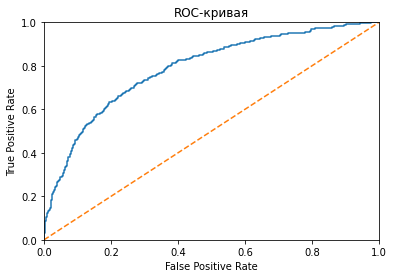

Площаль под ROC-кривой: 0.7879034658695676


In [27]:
auc_roc(model)

Обучим дерево решений:

In [28]:
def decision_tree(features, target):
    best_model = None
    best_f1 = 0
    for i in range(1,10):
        model = DecisionTreeClassifier(random_state=12345,
                                       max_depth=i)
        model.fit(features, target)
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        if f1 > best_f1:
            best_model = model
            best_f1 = f1
    print('best_model =', best_model)
    print('F1 =', best_f1)
    return best_model

In [29]:
best_model = decision_tree(features_train, target_train)

best_model = DecisionTreeClassifier(max_depth=7, random_state=12345)
F1 = 0.552469135802469


Построим ROC-кривую и найдем площаль под кривой:

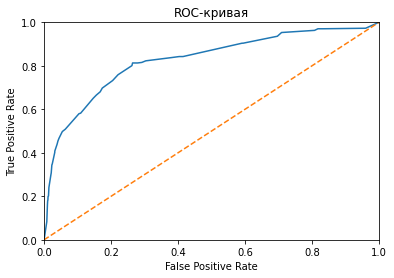

Площаль под ROC-кривой: 0.8259145123551905


In [30]:
auc_roc(best_model)

Обучим случайный лес:

Сначала найдем оптимальную величину глубины дерева:

In [31]:
%%time
best_model = None
best_f1 = 0
for i in range(1,20):
    model = RandomForestClassifier(random_state=12345,
                                   max_depth=i,
                                   n_estimators=30)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_f1:
        best_model = model
        best_f1 = f1
print('best_model =', best_model)
print('F1 =', best_f1)

best_model = RandomForestClassifier(max_depth=17, n_estimators=30, random_state=12345)
F1 = 0.5849923430321592
CPU times: user 3.59 s, sys: 12.2 ms, total: 3.6 s
Wall time: 3.61 s


Найдем оптимальное количество деревьев решений:

In [32]:
%%time
best_model = None
best_f1 = 0
for i in range(1,40):
    model = RandomForestClassifier(random_state=12345,
                                   max_depth=17,
                                   n_estimators=i)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_f1:
        best_model = model
        best_f1 = f1
print('best_model =', best_model)
print('F1 =', best_f1)

best_model = RandomForestClassifier(max_depth=17, n_estimators=30, random_state=12345)
F1 = 0.5849923430321592
CPU times: user 6.68 s, sys: 31.3 ms, total: 6.71 s
Wall time: 6.72 s


Построим ROC-кривую и найдем площаль под кривой:

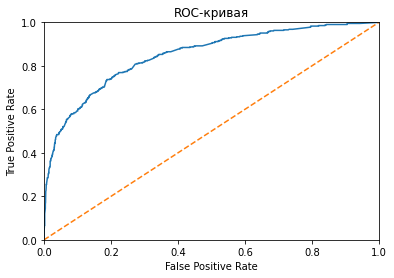

Площаль под ROC-кривой: 0.8489221116339761


In [33]:
auc_roc(best_model)

Выводы: 
- среди используемых моделей лучшие показатели метрик после обучения обеспечивает модель случайного леса;
- при поиске модели с наиболее высокой метрикой F1 улучшается и площадь под ROC-кривой.

## Борьба с дисбалансом

### Взвешивание классов

Выполним взвешивание классов, придадим объектам меньшего класса больший вес:

In [34]:
model = LogisticRegression(random_state=12345, 
                           solver='liblinear',
                           class_weight='balanced')
model.fit(features_train,target_train)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
print('F1:',f1)

F1: 0.5108601216333623


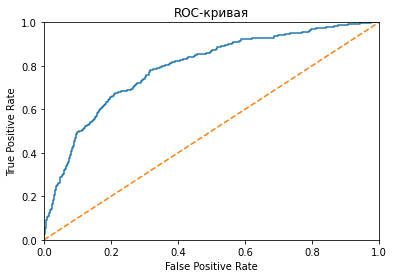

Площаль под ROC-кривой: 0.7920617073159445


In [35]:
auc_roc(model)

Обучим дерево решений:

In [36]:
%%time
model = DecisionTreeClassifier(random_state=12345, 
                               max_depth=5,
                               class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
print('model =', model)
print('F1 =', best_f1)

model = DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=12345)
F1 = 0.5849923430321592
CPU times: user 24.7 ms, sys: 27 µs, total: 24.8 ms
Wall time: 22.8 ms


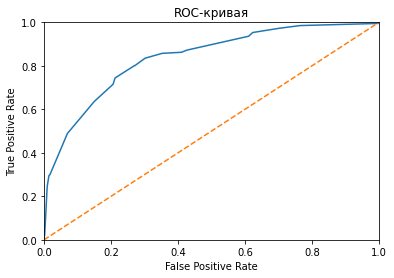

Площаль под ROC-кривой: 0.8373913204421678


In [37]:
auc_roc(model)

Обучим случайный лес:

Сначала найдем оптимальную величину глубины дерева:

In [38]:
%%time
best_model = None
best_f1 = 0
for i in range(1,20):
    model = RandomForestClassifier(random_state=12345,
                                   max_depth=i,
                                   n_estimators=30,
                                   class_weight='balanced')
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_f1:
        best_model = model
        best_f1 = f1
print('best_model =', best_model)
print('F1 =', best_f1)

best_model = RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=30,
                       random_state=12345)
F1 = 0.6351829988193625
CPU times: user 3.61 s, sys: 17.6 ms, total: 3.63 s
Wall time: 3.64 s


Найдем оптимальное количество деревьев решений:

In [39]:
%%time
best_model = None
best_f1 = 0
for i in range(1,20):
    model = RandomForestClassifier(random_state=12345,
                                   max_depth=10,
                                   n_estimators=i, 
                                   class_weight='balanced')
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_f1:
        best_model = model
        best_f1 = f1
print('best_model =', best_model)
print('F1 =', best_f1)

best_model = RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=12,
                       random_state=12345)
F1 = 0.646562123039807
CPU times: user 1.42 s, sys: 0 ns, total: 1.42 s
Wall time: 1.43 s


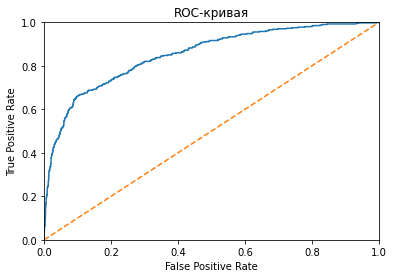

Площаль под ROC-кривой: 0.8521695809831403


In [40]:
auc_roc(best_model)

Вывод: после взвешивания классов предсказания моделей стали лучше чем без учета дисбаланса классов.

### Увеличение выборки

Увеличим количество положительных целевых признаков тем самым убрав дисбаланс классов:

In [41]:
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]
repeat = 4
features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
target_upsampled = pd.concat([target_zeros] + [target_ones]*repeat)
features_upsampled, target_upsampled = shuffle(features_upsampled,
                                               target_upsampled,
                                               random_state=12345)

Обучим логистическую регрессию:

In [42]:
model = logistic_regression(features_upsampled, target_upsampled)

F1: 0.5098374679213004


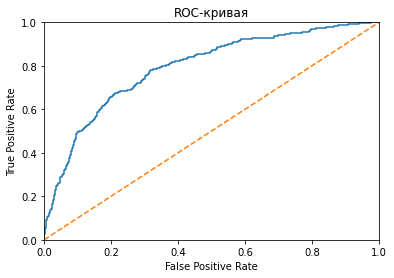

Площаль под ROC-кривой: 0.7921126056719276


In [43]:
auc_roc(model)

Обучим дерево решений:

In [44]:
best_model = decision_tree(features_upsampled, target_upsampled)

best_model = DecisionTreeClassifier(max_depth=6, random_state=12345)
F1 = 0.576544315129812


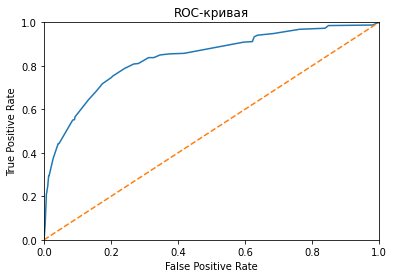

Площаль под ROC-кривой: 0.8363988025004974


In [45]:
auc_roc(best_model)

Обучим случайный лес:

Сначала найдем оптимальную величину глубины дерева:

In [46]:
%%time
best_model = None
best_f1 = 0
for i in range(1,20):
    model = RandomForestClassifier(random_state=12345,
                                   max_depth=i,
                                   n_estimators=30)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_f1:
        best_model = model
        best_f1 = f1
print('best_model =', best_model)
print('F1 =', best_f1)

best_model = RandomForestClassifier(max_depth=11, n_estimators=30, random_state=12345)
F1 = 0.6321585903083701
CPU times: user 4.77 s, sys: 17.7 ms, total: 4.79 s
Wall time: 4.8 s


Найдем оптимальное количество деревьев решений:

In [47]:
%%time
best_model = None
best_f1 = 0
for i in range(1,70):
    model = RandomForestClassifier(random_state=12345,
                                   max_depth=11,
                                   n_estimators=i)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_f1:
        best_model = model
        best_f1 = f1
print('best_model =', best_model)
print('F1 =', best_f1)

best_model = RandomForestClassifier(max_depth=11, n_estimators=62, random_state=12345)
F1 = 0.6407119021134594
CPU times: user 23.3 s, sys: 87.2 ms, total: 23.4 s
Wall time: 23.4 s


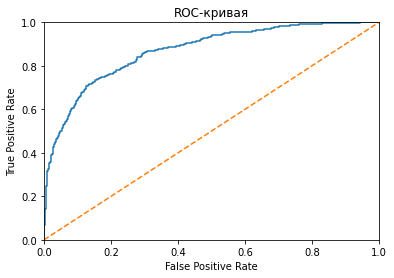

Площаль под ROC-кривой: 0.8686606483216652


In [48]:
auc_roc(best_model)

Выводы: метрики каждой модели при учете дисбаланса улучшились.

### Уменьшение выборки

Уменьшим количество нулевых целевых признаков тем самым убрав дисбаланс классов:

In [49]:
fraction = 0.255
features_downsampled = pd.concat(
    [features_zeros.sample(frac=fraction,
                           random_state=12345)] + [features_ones])
target_downsampled = pd.concat(
    [target_zeros.sample(frac=fraction,
                         random_state=12345)] + [target_ones])
features_downsampled, target_downsampled = shuffle(features_downsampled,
                                                   target_downsampled,
                                                   random_state=12345)

Обучим логистическую регрессию:

In [50]:
model = logistic_regression(features_downsampled, target_downsampled)

F1: 0.5121527777777778


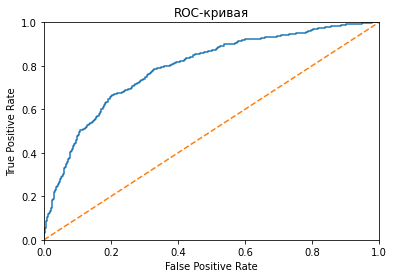

Площаль под ROC-кривой: 0.7913552998298761


In [51]:
auc_roc(model)

Обучим дерево решений:

In [52]:
best_model = decision_tree(features_downsampled, target_downsampled)

best_model = DecisionTreeClassifier(max_depth=6, random_state=12345)
F1 = 0.5974534769833496


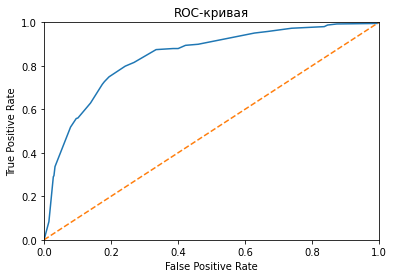

Площаль под ROC-кривой: 0.8421827065894861


In [53]:
auc_roc(best_model)

Обучим случайный лес:

Сначала найдем оптимальную величину глубины дерева:

In [54]:
%%time
best_model = None
best_f1 = 0
for i in range(1,20):
    model = RandomForestClassifier(random_state=12345,
                                   max_depth=i,
                                   n_estimators=30)
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_f1:
        best_model = model
        best_f1 = f1
print('best_model =', best_model)
print('F1 =', best_f1)

best_model = RandomForestClassifier(max_depth=9, n_estimators=30, random_state=12345)
F1 = 0.6164519326065412
CPU times: user 1.98 s, sys: 3.74 ms, total: 1.98 s
Wall time: 1.99 s


Найдем оптимальное количество деревьев решений:

In [55]:
%%time
best_model = None
best_f1 = 0
for i in range(1,70):
    model = RandomForestClassifier(random_state=12345,
                                   max_depth=9,
                                   n_estimators=i)
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_f1:
        best_model = model
        best_f1 = f1
print('best_model =', best_model)
print('F1 =', best_f1)

best_model = RandomForestClassifier(max_depth=9, n_estimators=59, random_state=12345)
F1 = 0.6265761396702231
CPU times: user 8.4 s, sys: 43.1 ms, total: 8.45 s
Wall time: 8.46 s


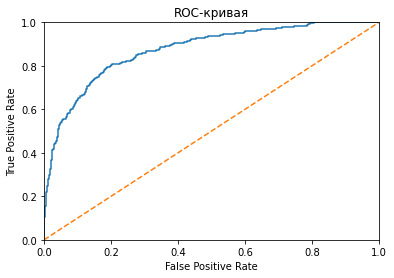

Площаль под ROC-кривой: 0.8729191441055848


In [56]:
auc_roc(best_model)

Вывод: метод уменьшения обучающей выборки ухудшает метрики моделей по сравнению с методами ее увеличения или взвешивания классов.

## Тестирование модели

Лучшей моделью оказалась модель случайного леса с сбалансированными весами классов, проведем финальное тестирование на валидационной выборке:

In [57]:
model = RandomForestClassifier(random_state=12345,
                               max_depth=10,
                               n_estimators=12,
                               class_weight='balanced')
model.fit(features_train_80, target_train_80)
predicted_test = model.predict(features_test)
f1 = f1_score(target_test, predicted_test)
print('model =', model)
print('F1 =', f1)

model = RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=12,
                       random_state=12345)
F1 = 0.6182237600922721


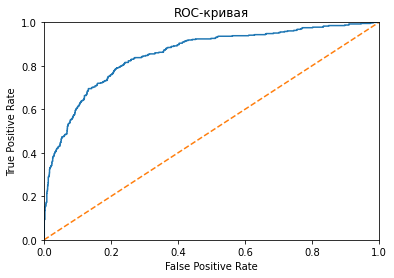

Площаль под ROC-кривой: 0.8549443125714312


In [58]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('Площаль под ROC-кривой:', auc_roc)

Вывод: на тестовой выборке значение метрики F1 = 0.618

## Вывод

- была выполнена предобработка данных: удалены лишние признаки и заполнены пропуски;
- данные были разделены на обучающую и валидационную выборки;
- категориальные признаки преобразовали в численные методом ОНЕ;
- выполнено масштабирование численных признаков методом стандартизации;
- были обучены модели линейной регрессии, дерева решений и случайного леса с учетом дисбаланса классов и без учета дисбаланса;
- выявлено что при учете дисбаланса метрики моделей улучшаются.